In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Iris.csv')
data.drop(columns='Id', inplace=True, axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [4]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Model Building

###### train test split

In [7]:
X = data.drop(columns='Species', inplace=False, axis=1)
y = data.Species

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=99)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


### DecisionTreeClassifier object and train

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

###### prediction using trainig data

In [10]:
pred_res1 = model.predict(X_train)

In [11]:
print(classification_report(y_train, pred_res1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [12]:
confusion_matrix(y_train, pred_res1)

array([[38,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 35]], dtype=int64)

In [13]:
accuracy_score(y_train, pred_res1)

1.0

###### prediction using test data

In [14]:
pred2 = model.predict(X_test)

In [15]:
print(classification_report(y_test, pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [16]:
confusion_matrix(y_test, pred2)

array([[12,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 14]], dtype=int64)

In [17]:
accuracy_score(y_test, pred2)

0.9555555555555556

# Plotting the Decision Tree

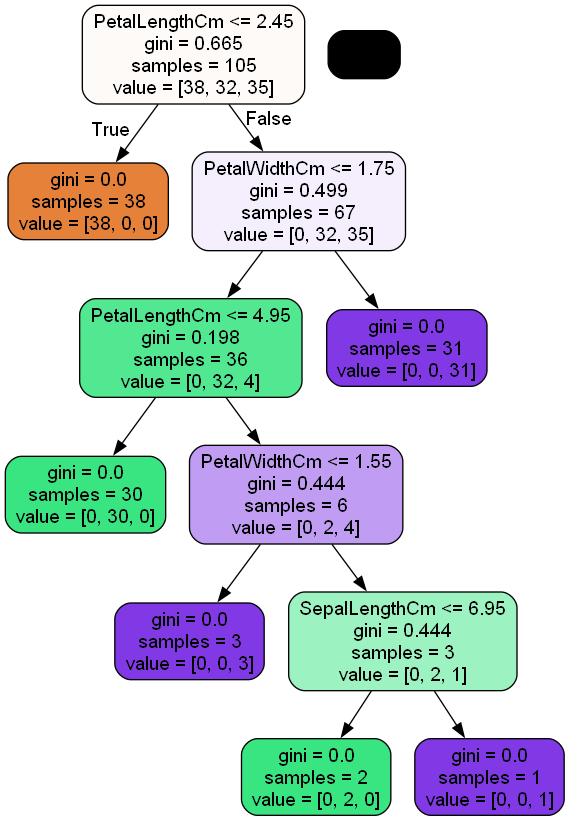

In [18]:
features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(decision_tree=model, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Optimise HyperParameters using KFold and GridSearchCV

In [22]:
from sklearn.model_selection import KFold, GridSearchCV

no_of_kfolds = 5

parameters = {'max_depth': range(0,10)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)


tree = GridSearchCV(estimator=dtree, cv=no_of_kfolds, param_grid=parameters, return_train_score=True, scoring='accuracy')
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(0, 10)}, return_train_score=True,
             scoring='accuracy')

In [23]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000997,0.000001,0.000000,0.000000,0,{'max_depth': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.003989,0.000632,0.002592,0.000505,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
2,0.003645,0.000542,0.003190,0.000756,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
3,0.003783,0.000396,0.002592,0.000490,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
4,0.003398,0.000482,0.003424,0.001042,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909


In [25]:
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_training_score'], lable='training accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], lable='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

KeyError: 'mean_training_score'

<Figure size 640x480 with 0 Axes>